In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline


# the switching binomial generative model


## likelihood function

In [2]:
import bayesianchangepoint as bcp
help(bcp.likelihood)
for p_ in [0, .25, .5, .75, 1]:
    for r in (2**np.arange(5)-1):
        print('Knowing p=', p_, 'and r=', r, ', the likelihood for 0=', bcp.likelihood(0, p_, r), ', for 1=', bcp.likelihood(1, p_, r), ', sum=', bcp.likelihood(0, p_, r)+bcp.likelihood(1, p_, r))


Help on function likelihood in module bayesianchangepoint.bcp:

likelihood(o, p, r)
    Knowing p and r, the likelihood of observing o is that of a binomial of
    
        - mean rate of chosing 1 = (p*r + o)/(r+1)
        - number of choices = 1 equal to p*r+1
    
    since both likelihood sum to 1, the likelihood of drawing o in {0, 1}
    is equal to

Knowing p= 0 and r= 0 , the likelihood for 0= 0.5 , for 1= 0.5 , sum= 1.0
Knowing p= 0 and r= 1 , the likelihood for 0= 0.8 , for 1= 0.2 , sum= 1.0
Knowing p= 0 and r= 3 , the likelihood for 0= 0.904593639576 , for 1= 0.095406360424 , sum= 1.0
Knowing p= 0 and r= 7 , the likelihood for 0= 0.953209801918 , for 1= 0.0467901980818 , sum= 1.0
Knowing p= 0 and r= 15 , the likelihood for 0= 0.976812163876 , for 1= 0.0231878361244 , sum= 1.0
Knowing p= 0.25 and r= 0 , the likelihood for 0= 0.5 , for 1= 0.5 , sum= 1.0
Knowing p= 0.25 and r= 1 , the likelihood for 0= 0.638667676816 , for 1= 0.361332323184 , sum= 1.0
Knowing p= 0.25 and r= 3 ,

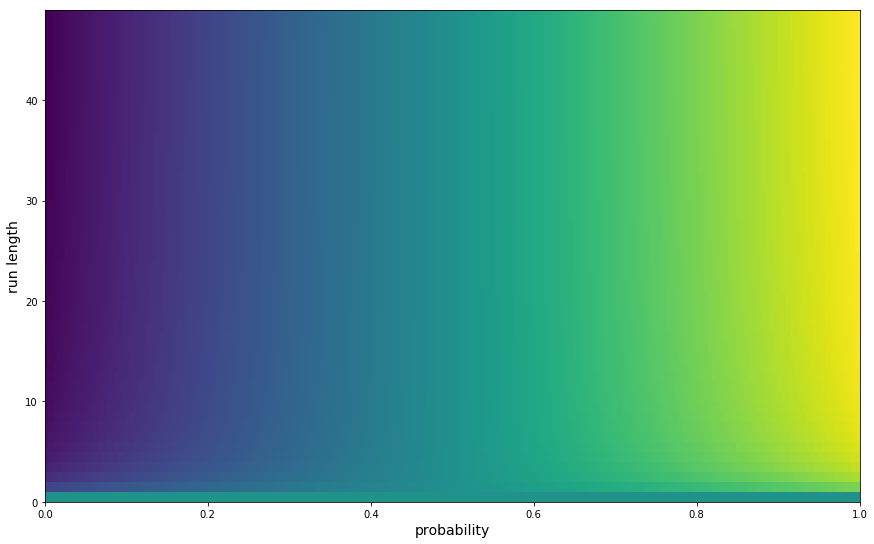

In [3]:

fig_width= fig_width
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180), sharex=True)

p, r = np.meshgrid(np.linspace(0., 1., 200, endpoint=True), np.arange(50))

L = bcp.likelihood(o=1, p=p, r=r)

CS = ax.pcolormesh(p, r, L)
#manual_locations = [(.7, 10), (.5, 20), (.3, 30), (.2, 35), (.15, 40)]
#plt.clabel(CS, inline=1, fontsize=20, colors = 'k')#, manual=manual_locations)

fig.tight_layout()
#axs[i_layer].set_xlim(0, N_trials)
#axs[i_layer].set_ylim(-.05, 1 + .05)
#axs[i_layer].axis('tight')
#            axs[i_layer].set_yticks(np.arange(1)+.5)
#            axs[i_layer].set_yticklabels(np.arange(1) )
ax.set_ylabel('run length', fontsize=14)
#axs[i_layer].axis('tight')
ax.set_xlabel('probability', fontsize=14);


In [4]:
print(L)

[[ 0.5         0.5         0.5        ...,  0.5         0.5         0.5       ]
 [ 0.2         0.20567954  0.21032469 ...,  0.78967531  0.79432046  0.8       ]
 [ 0.12903226  0.13597558  0.14154403 ...,  0.85845597  0.86402442
   0.87096774]
 ..., 
 [ 0.00768545  0.01402518  0.0193252  ...,  0.9806748   0.98597482
   0.99231455]
 [ 0.00752817  0.01385256  0.01914637 ...,  0.98085363  0.98614744
   0.99247183]
 [ 0.00737721  0.01368664  0.01897446 ...,  0.98102554  0.98631336
   0.99262279]]


## performing inference: application to synthetic data

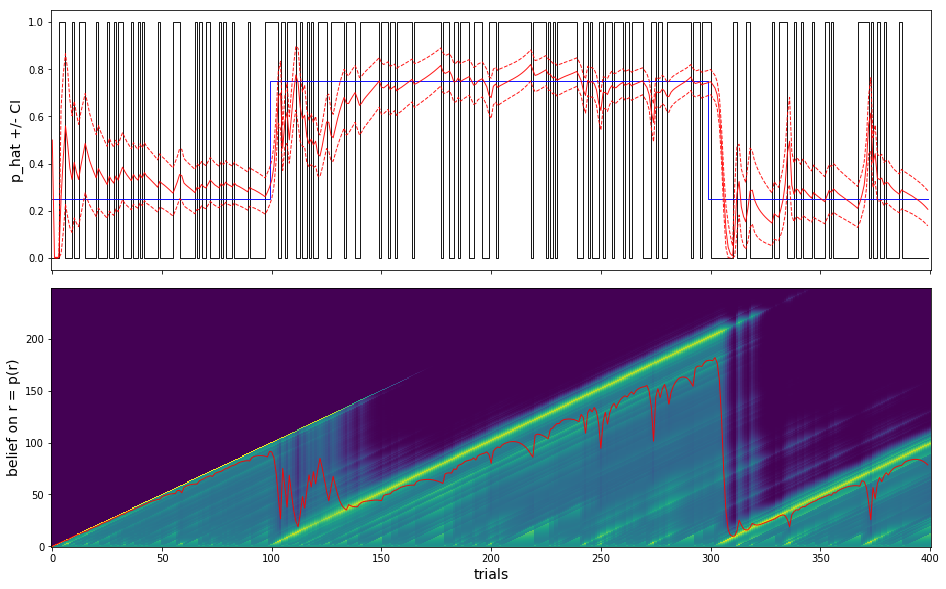

In [5]:

T = 400
p_gen = .25 * np.ones(T)
p_gen[100:300] = .75
np.random.seed(42)
o = 1 * (p_gen > np.random.rand(T))
p_bar, r, beliefs = bcp.inference(o, h=1/200, p0=.5)
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250)


In [6]:
t=4
np.zeros((t+2)), np.arange(1)

(array([ 0.,  0.,  0.,  0.,  0.,  0.]), array([0]))

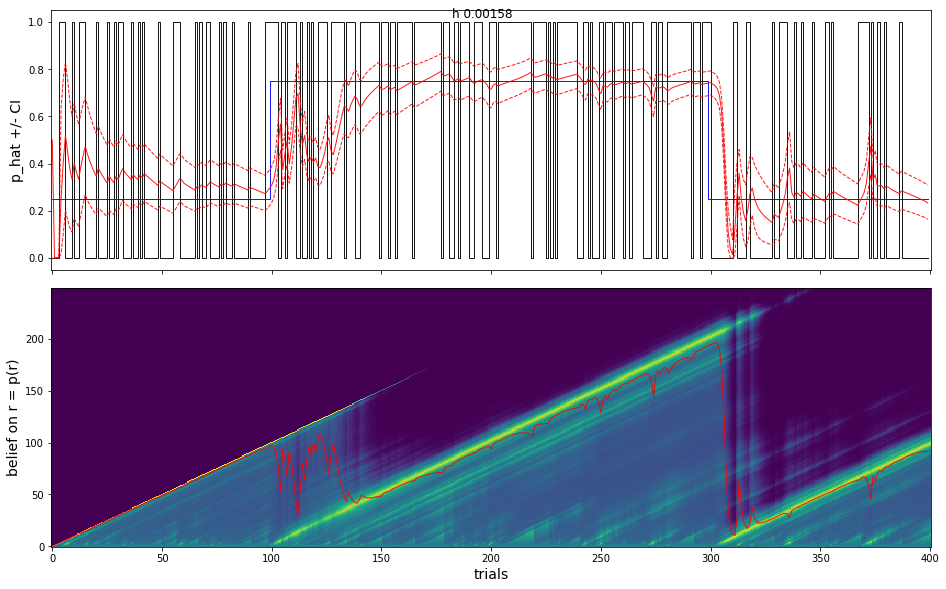

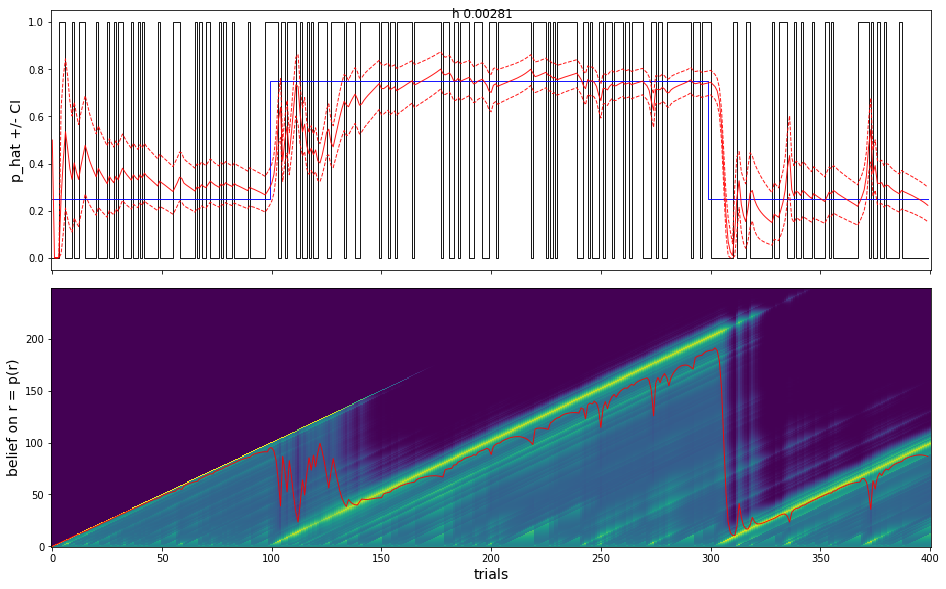

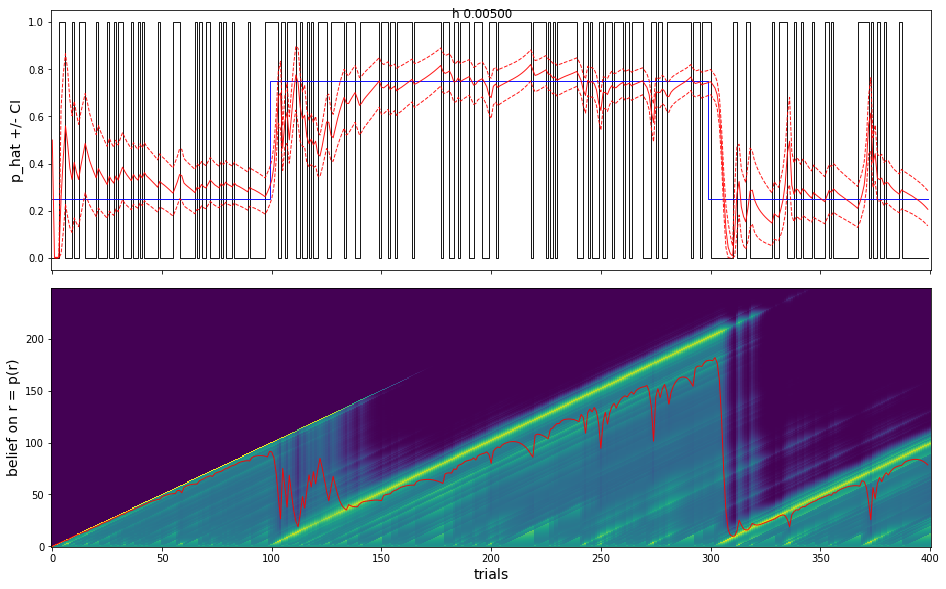

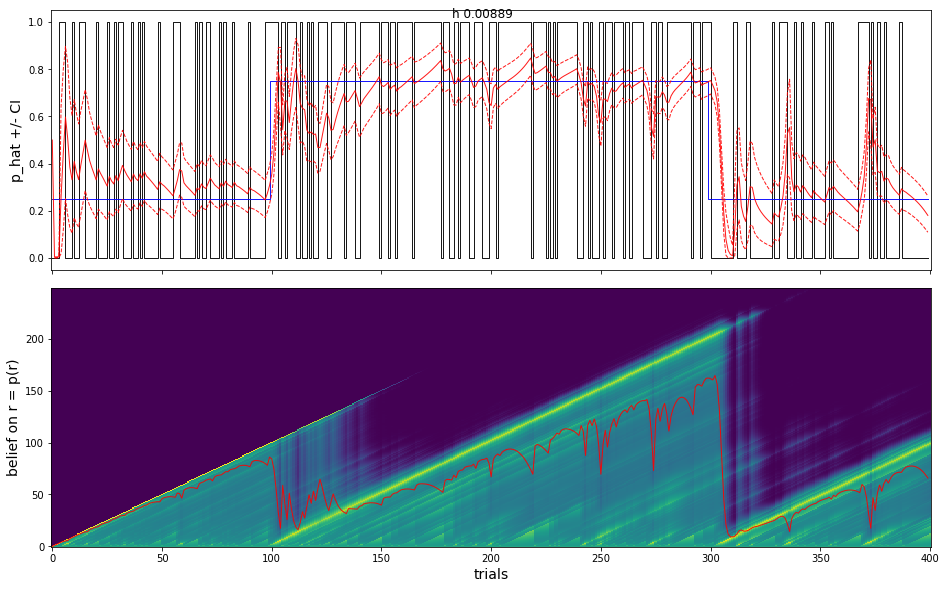

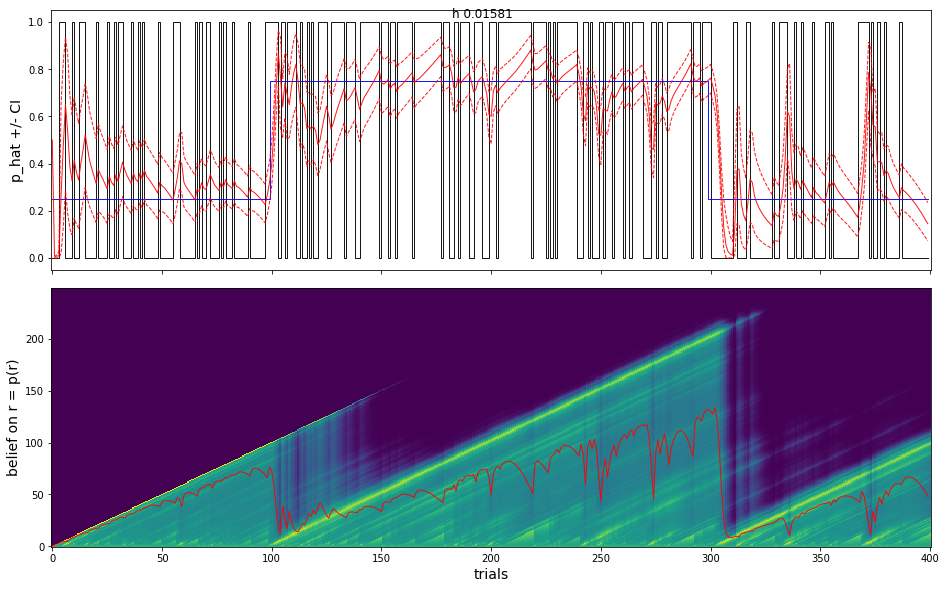

In [7]:
for h_ in 1/200*np.logspace(-.5, .5, 5):
    p_bar, r, beliefs = bcp.inference(o, h=h_, p0=.5)
    fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250)
    fig.suptitle('h %.5f' % h_)
    plt.show()

## performing inference: application to experimental data

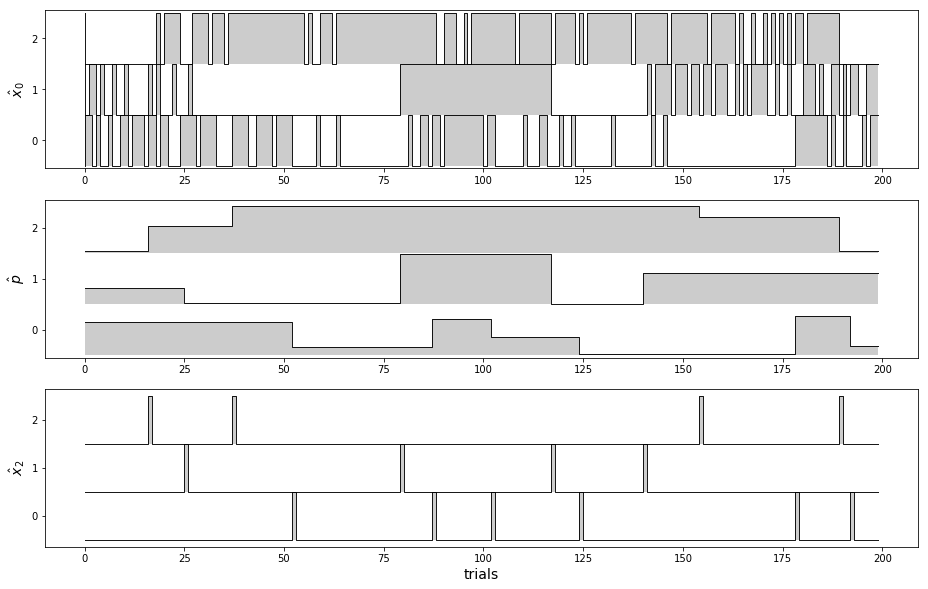

In [8]:
import sys
sys.path.append('..')

from aSPEM import binomial_motion, aSPEM

import time
a = aSPEM(mode='model', timeStr = time.strftime("%Y-%m-%d_%H%M%S", time.localtime()))

fig, axs, p = a.plot()

In [9]:
p.shape

(200, 3, 3)

In [10]:
i_block = 0
print('occurrences=', p[:, i_block, 0])
print('p=', p[:, i_block, 1])
print('switches=', p[:, i_block, -1])

occurrences= [ 0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.
  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.
  1.  1.]
p= [ 0.64752352  0.64752352  0.64752352  0.64752352  0.64752352  0.64752352
  0.64752352  0.64752352  0.64752352  0.64752352  0.64752352  0.64752352
  0.64752352  0.64752352 

In [11]:
N_trials = a.exp['N_trials']
h = 1./a.exp['tau']
print('this experiment uses', N_trials, 'trials and a switch rate of h=', h, '(that is, one switch every', 1/h, 'trials on average)')

this experiment uses 200 trials and a switch rate of h= 0.025 (that is, one switch every 40.0 trials on average)


i_block= 0


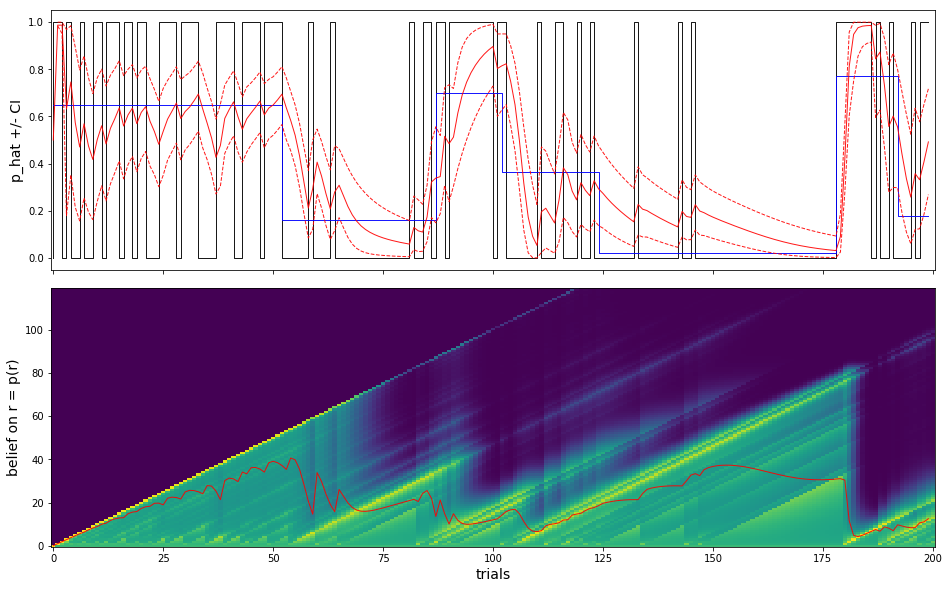

i_block= 1


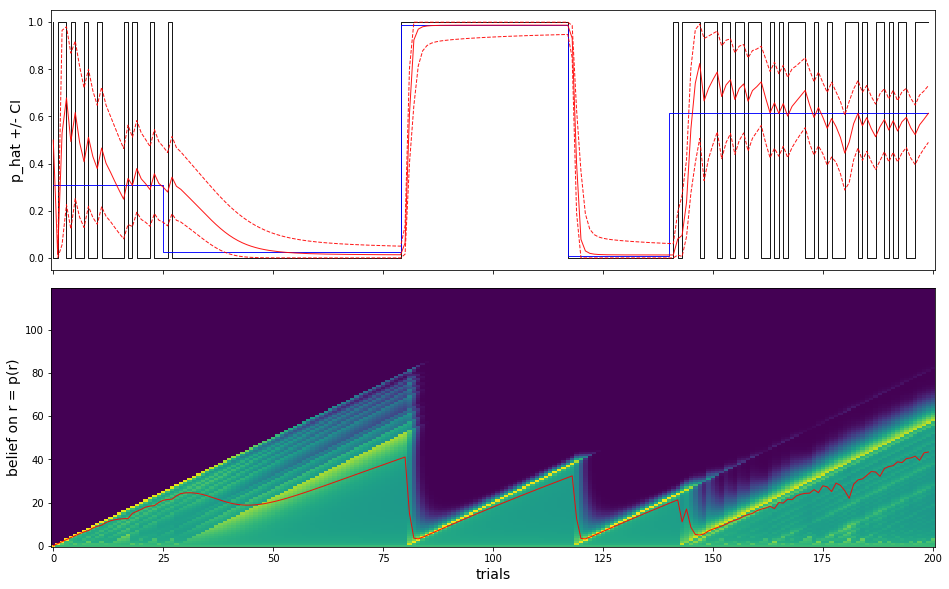

i_block= 2


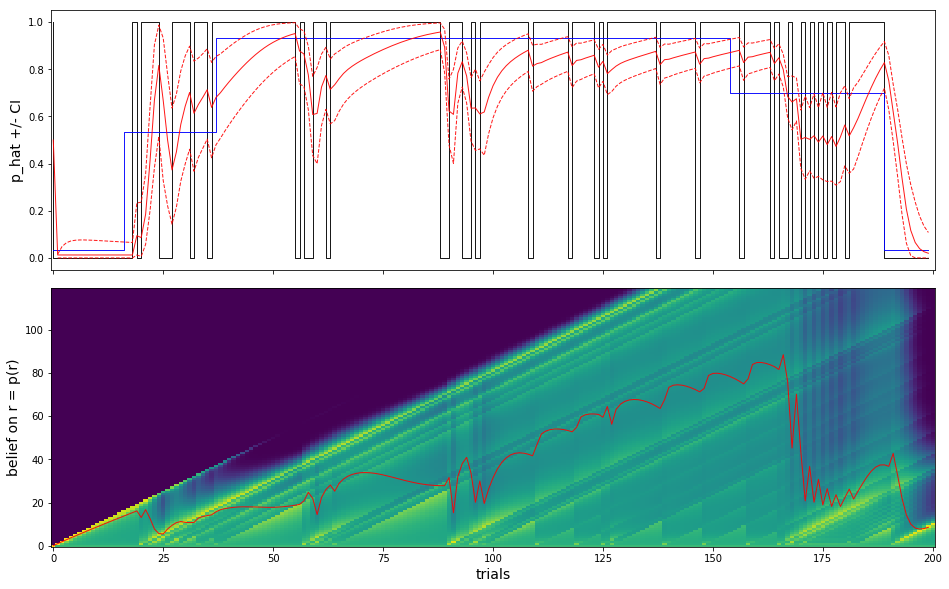

In [12]:
for i_block in range(3):
    print('i_block=', i_block)
    o = p[:, i_block, 0]
    p_bar, r, beliefs = bcp.inference(o, h=h, p0=.5)
    fig, axs = bcp.plot_inference(p[:, i_block, 0], p[:, i_block, 1], p_bar, r, beliefs)
    plt.show()